# Australian Grand Prix 2024

In [24]:
import numpy as np
import fastf1
import fastf1.plotting
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from fastf1.core import Laps
from timple.timedelta import strftimedelta
from fastf1.ergast import Ergast
import plotly.express as px
from plotly.io import show
import matplotlib.font_manager as font_manager
fastf1.plotting.setup_mpl()
import sys
import warnings
warnings.filterwarnings("ignore")

______
### Set up Formula1 Font
----

In [76]:
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager

for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Formula'.lower() in fontpath.lower():
        print(fontpath)

C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Bold-4.ttf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Black.ttf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Wide.ttf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Regular.otf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Regular-1.ttf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Bold_web.ttf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Italic.ttf
C:\Users\ricca\AppData\Local\Microsoft\Windows\Fonts\Formula1-Wide.otf


In [77]:
personal_path = '\\Users\\ricca\\AppData\\Local\\Microsoft\\Windows\\Fonts'


font_path = personal_path + '\\Formula1-Regular-1.ttf'
regular = FontProperties(fname=font_path)

font_path = personal_path + '\\Formula1-Bold-4.ttf' 
bold = FontProperties(fname=font_path)

font_path = personal_path + '\\Formula1-Black.ttf'
black = FontProperties(fname=font_path)

font_path = personal_path + '\\Formula1-Wide.ttf'
wide = FontProperties(fname=font_path)

font_path = personal_path + '\\Formula1-Italic.ttf'
italic = FontProperties(fname=font_path)


____

In [2]:
sys.path.insert(0, "../")
from settings import CACHE_FOLDER_PATH
from utlis import *

CACHE_FOLDER_PATH: C:\Users\ricca\OneDrive - ZHAW\Dokumente\f1_cache


In [3]:
setup_cache(CACHE_FOLDER_PATH)

In [4]:
session = fastf1.get_session(2024, 'Melbourne', 'R')
session.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v3.3.2]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/3/results.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\ricca\OneDrive - ZHAW\Desktop\Projects\.venv\lib\site-packages\requests_cache\session.py", line 290, in _resend
    response.raise_for_status()
  File "c:\Users\ricca\OneDrive - ZHAW\Desktop\Projects\.venv\lib\site-packages\requests\models.py", line 1021, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend fetch failed for url: https://ergast.com/api/f1/2024/3/results.json
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data f

In [5]:
laps = session.laps

![Bahrain Circuit](https://media.formula1.com/image/upload/f_auto/q_auto/v1677244985/content/dam/fom-website/2018-redesign-assets/Circuit%20maps%2016x9/Australia_Circuit.png.transform/5col-retina/image.png)

It's already the third round and we'll take a look at the scored points to this points 

In [6]:
ergast = Ergast()
races = ergast.get_race_schedule(2024)  # Races in the year 2024
results = []

Request for URL https://ergast.com/api/f1/2024/races.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\ricca\OneDrive - ZHAW\Desktop\Projects\.venv\lib\site-packages\requests_cache\session.py", line 290, in _resend
    response.raise_for_status()
  File "c:\Users\ricca\OneDrive - ZHAW\Desktop\Projects\.venv\lib\site-packages\requests\models.py", line 1021, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend fetch failed for url: https://ergast.com/api/f1/2024/races.json


In [ ]:
session.result

In [7]:
for rnd, race in races['raceName'].items():
    race_results = ergast.get_race_results(season=2024, round=rnd + 1)
    if race_results.content: 
        temp = race_results.content[0]


        sprint_results = ergast.get_sprint_results(season=2024, round=rnd + 1)
        if sprint_results.content and sprint_results.description['round'][0] == rnd + 1:
            temp = pd.merge(temp, sprint_results.content[0], on='driverCode', how='left')
            temp['points'] = temp['points_x'] + temp['points_y']
            temp.drop(columns=['points_x', 'points_y'], inplace=True)

        temp['round'] = rnd + 1
        temp['race'] = race.removesuffix(' Grand Prix')
        temp = temp[['round', 'race', 'driverCode', 'points']]  
        results.append(temp)


results = pd.concat(results)
races = results['race'].drop_duplicates()

pivot = results.pivot_table(index='round', columns='driverCode', values='points', aggfunc='sum').fillna(0).cumsum()
zero_row = pd.DataFrame(0, index=[0], columns=pivot.columns)
new_pivot = pd.concat([zero_row, pivot])

new_pivot.reset_index(drop = True, inplace=True)

Request for URL https://ergast.com/api/f1/2024/1/results.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\ricca\OneDrive - ZHAW\Desktop\Projects\.venv\lib\site-packages\requests_cache\session.py", line 290, in _resend
    response.raise_for_status()
  File "c:\Users\ricca\OneDrive - ZHAW\Desktop\Projects\.venv\lib\site-packages\requests\models.py", line 1021, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend fetch failed for url: https://ergast.com/api/f1/2024/1/results.json
Request for URL https://ergast.com/api/f1/2024/1/sprint.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\ricca\OneDrive - ZHAW\Desktop\Projects\.venv\lib\site-packages\requests_cache\session.py", line 290, in _resend
    response.raise_for_status()
  File "c:\Users\ricca\OneDrive - ZHAW\Desktop\Projects\.venv\lib\site-packages\requests\models.py", line 1021, in ra

In [8]:
races_list = races.tolist()
races_list.insert(0, "Start")
races = pd.Series(races_list)

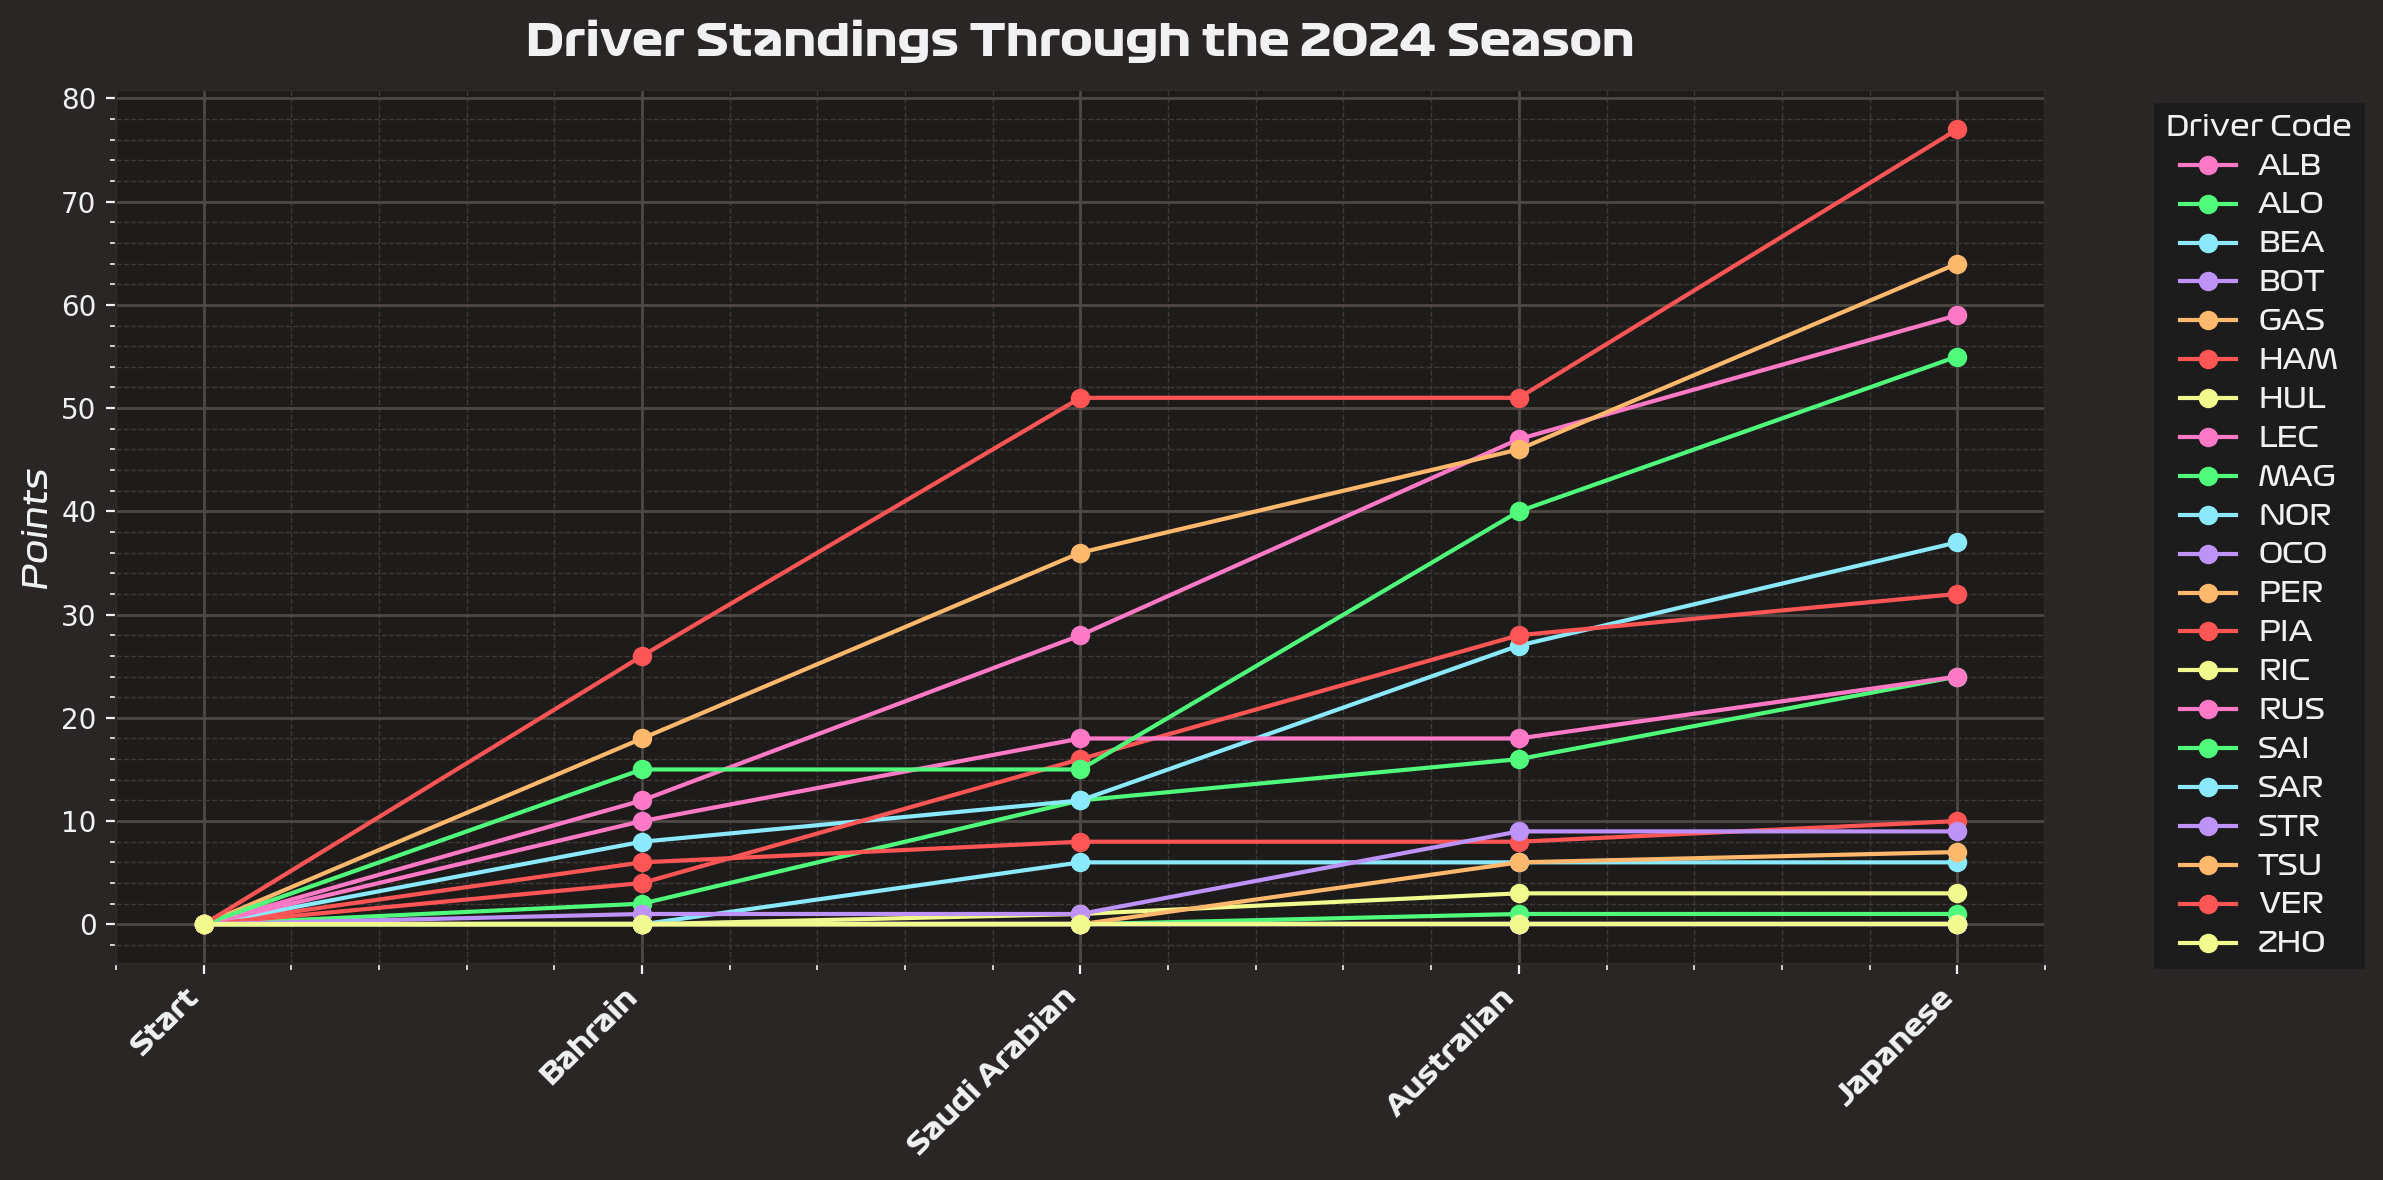

In [100]:
fig, ax = plt.subplots(figsize=(12, 6), dpi = 200 )
for column in new_pivot.columns:
    ax.plot(new_pivot.index, new_pivot[column], marker='o', label=column)

ax.set_xticks(range(len(races)))
ax.set_xticklabels(races, rotation=45, ha='right', font = bold)
ax.set_ylabel('Points', fontsize=12, font = italic)
ax.set_title('Driver Standings Through the 2024 Season', font = bold, fontsize=16)
ax.grid(True)
legend = ax.legend(title='Driver Code', prop = regular, fontsize = 10, bbox_to_anchor=(1.05, 1), loc='upper left')

legend.get_title().set_fontproperties(regular)
legend.get_title().set_fontsize(10)  

plt.tight_layout()
plt.show()

## Bokeh example 

In [101]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, WheelZoomTool, ResetTool, Legend
from bokeh.layouts import column
from bokeh.io import show

output_notebook(hide_banner = True)

In [103]:
data = {
    'rounds': [str(x) for x in races] 
}

for column in new_pivot.columns:
    data[column] = new_pivot[column].tolist()

source = ColumnDataSource(data=data)

driver_colors = {driver: ff1.plotting.driver_color(driver) for driver in new_pivot.columns}

p = figure(x_range=data['rounds'], width=800, height=400, title='Driver Standings Through the 2024 Season',
           tools=[HoverTool(), WheelZoomTool(), ResetTool()],)

hover = p.select_one(HoverTool)
hover.tooltips = [
    ("Round", "@rounds"),
    ("Driver", "$name"),  
    ("Points", "@$name")  
]

p.title.text_font = "arial"
p.xaxis.axis_label_text_font = "arial"
p.yaxis.axis_label_text_font = "arial"

p.title.text_font_size = '22pt'

for driver in new_pivot.columns:
    p.line('rounds', driver, source=source, line_width=2, color=driver_colors[driver])
    p.scatter('rounds', driver, source=source,  marker='circle', size=8, fill_color=driver_colors[driver], name=driver)

p.xaxis.axis_label = 'Round'
p.yaxis.axis_label = 'Points'
p.axis.axis_label_text_font_style = 'bold'
p.axis.major_label_orientation = "horizontal"
p.grid.grid_line_alpha = 0.3

p.legend.location = "top_left"
p.legend.title = 'Driver Code'

show(p)


# Drivers Result 

In [123]:
def plot_positions(session):
    fig, ax = plt.subplots(figsize=(12, 5), dpi=300)
    
    for drv in session.drivers:
        drv_laps = session.laps.pick_driver(drv)
        if drv_laps.empty:
            continue  # Skip drivers with no laps

        abb = drv_laps['Driver'].iloc[0]
        color = ff1.plotting.driver_color(abb)
        ax.plot(drv_laps['LapNumber'], drv_laps['Position'], label=abb, color=color)

    for drv in session.drivers:
        drv_laps = session.laps.pick_driver(drv)
        if drv_laps.empty or np.isnan(drv_laps['Position'].iloc[0]):
            continue
        
        abb = drv_laps['Driver'].iloc[0]
        starting_position = int(drv_laps['Position'].iloc[0])
        ax.text(0.8, starting_position, f"P{starting_position}: {abb}", color='w', ha='right', font = regular)

    for drv in session.drivers:
        drv_laps = session.laps.pick_driver(drv)
        if drv_laps.empty:
            continue
        
        abb = drv_laps['Driver'].iloc[0]
        final_position = drv_laps['Position'].iloc[-1]
        starting_position = int(drv_laps['Position'].iloc[0])
        if np.isnan(final_position) or np.isnan(starting_position):
            continue
        
        places_gained = int(starting_position - final_position)
        places_text = f"({'+' if places_gained > 0 else '' if places_gained == 0 else '-'}{abs(places_gained)})"
        ax.text(57, final_position, f"P{starting_position}:{abb} {places_text}", color='w', ha='left', font = regular)

    ax.annotate('Starting Position', xy=(-0.14, 0.4), xycoords='axes fraction',font = italic, fontsize=14, color='w', rotation=90)
    ax.annotate('Finishing Position', xy=(+1.14, 0.4), xycoords='axes fraction',font = italic, fontsize=14, color='w', rotation=-90)
    ax.set_ylim([20.5, 0.5])
    ax.set_yticks([])
    ax.set_xlabel('Lap', fontsize=14, font = italic)
    ax.set_xlim([1, 57])
    plt.title(f'{session}', font=bold ,  fontsize=24, y=1.08)
    plt.tight_layout()
    plt.show()



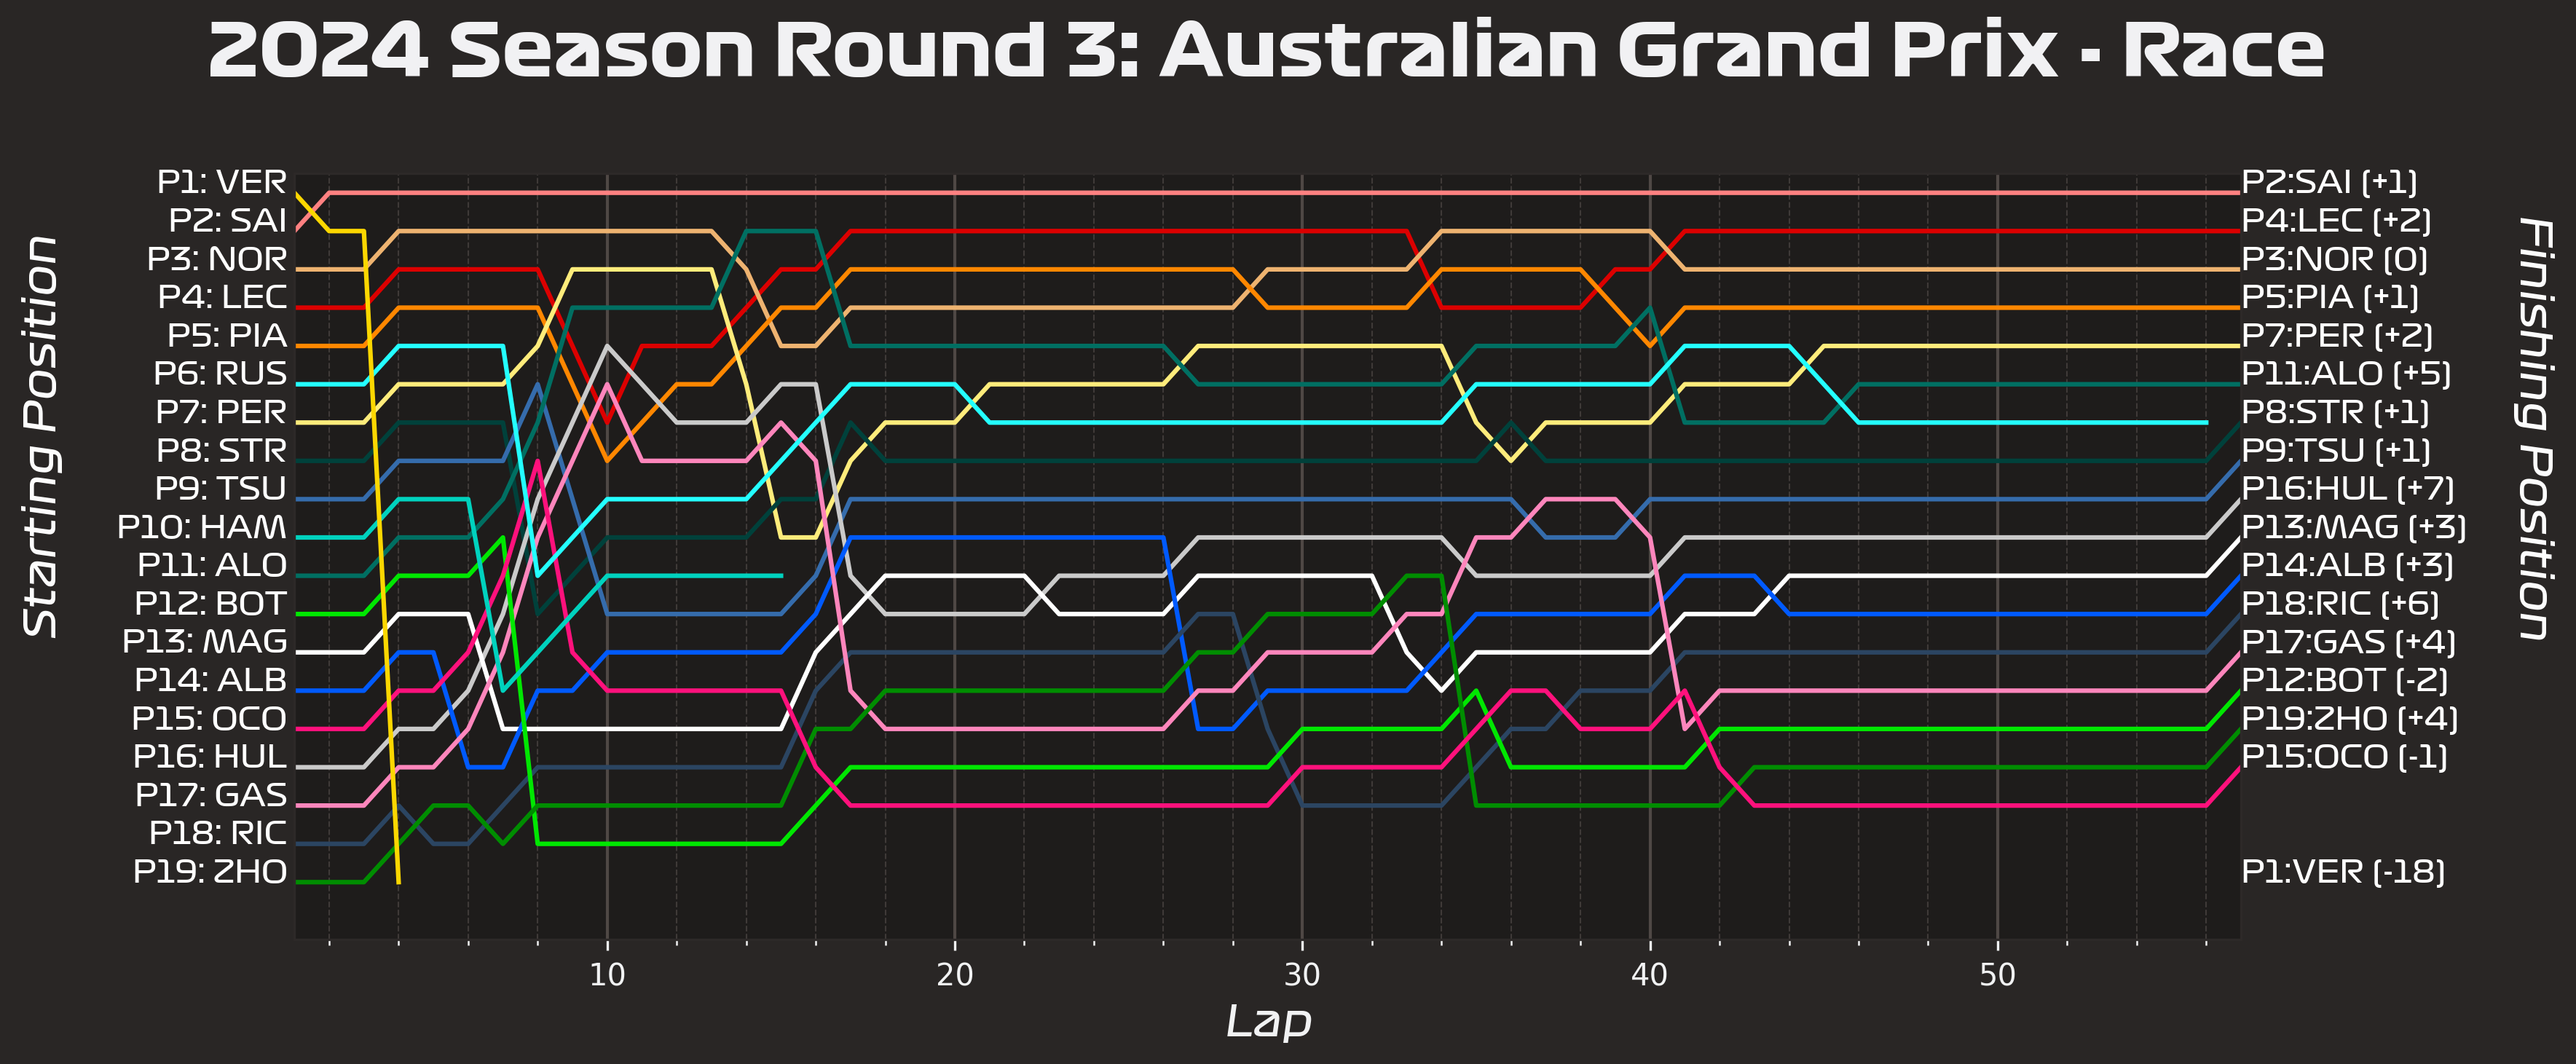

In [124]:
plot_positions(session)

# Team Mates Tyre usage dComparison 

In [125]:
lec = session.laps.pick_driver("LEC").pick_quicklaps().reset_index()
sai = session.laps.pick_driver("SAI").pick_quicklaps().reset_index()
lec_tel = lec.pick_fastest().get_car_data().add_distance()
sai_tel = sai.pick_fastest().get_car_data().add_distance()

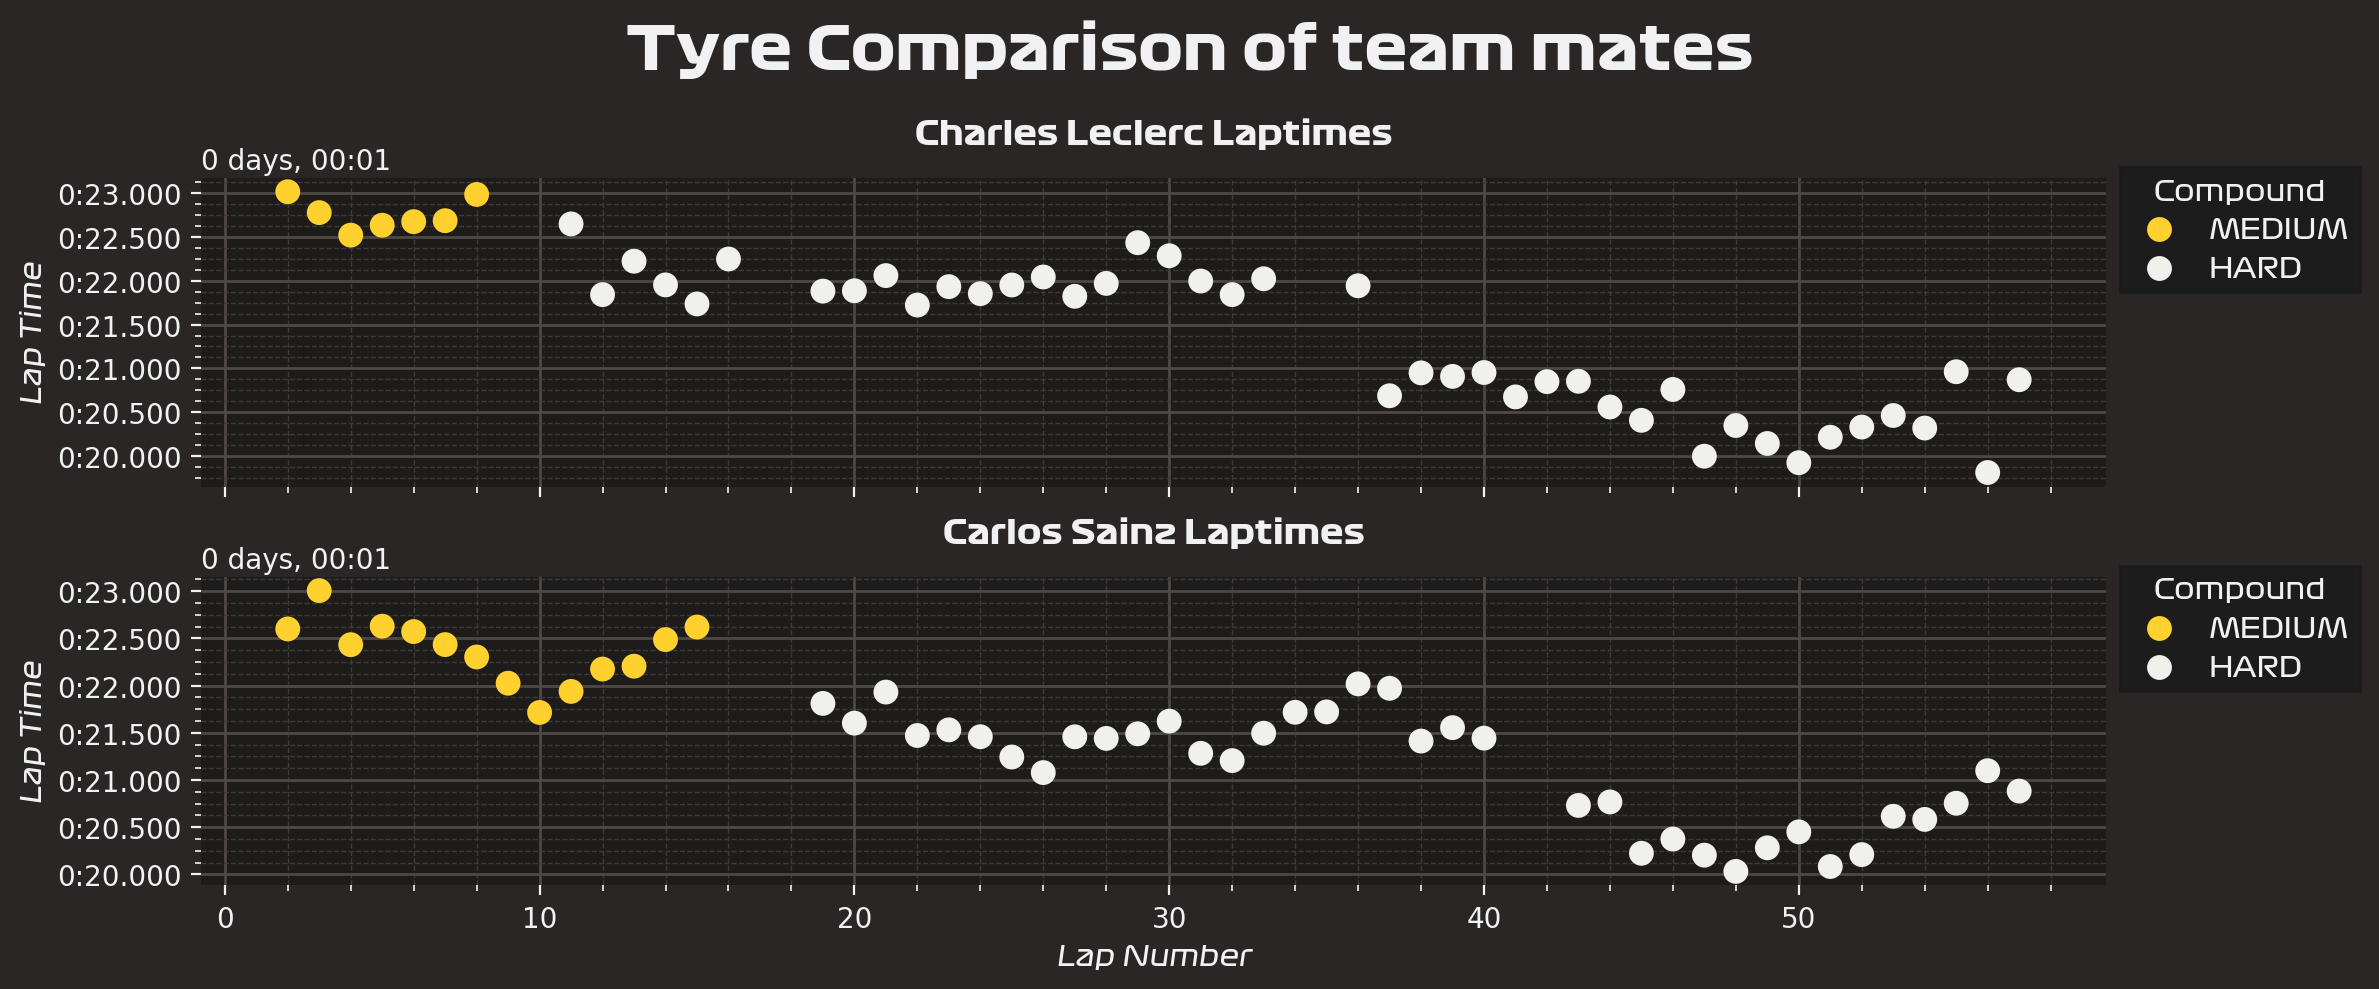

In [144]:
fig, (ax1,ax2)= plt.subplots(2,1,figsize=(12, 5), dpi = 200, sharex= True)
sns.scatterplot(data=lec,
                x="LapNumber",
                y="LapTime",
                ax=ax1,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0)

ax1.set_ylabel("Lap Time", font = italic)

ax1.invert_yaxis()
ax1.set_title("Charles Leclerc Laptimes", font = bold, fontsize = 12)
handles, labels = ax1.get_legend_handles_labels()

legend = ax1.legend(handles=handles, prop = regular, labels=labels, title="Compound", loc="upper left",  bbox_to_anchor=(1, 1.078))
legend.get_title().set_fontproperties(regular)
legend.get_title().set_fontsize(10)  

sns.scatterplot(data=sai,
                x="LapNumber",
                y="LapTime",
                ax=ax2,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0)

ax2.set_xlabel("Lap Number", font = italic)
ax2.set_ylabel("Lap Time", font = italic)
ax2.invert_yaxis()
ax2.set_title("Carlos Sainz Laptimes", font = bold, fontsize  = 12 )
handles, labels = ax2.get_legend_handles_labels()

legend = ax2.legend(handles=handles, prop = regular, labels=labels, title="Compound", loc="upper left",  bbox_to_anchor=(1, 1.078))
legend.get_title().set_fontproperties(regular)
legend.get_title().set_fontsize(10)


sns.despine(left=True, bottom=True)
# plt.subplots_adjust(hspace=5) 
plt.suptitle('Tyre Comparison of team mates', font= bold, fontsize = 22)
plt.tight_layout()
plt.show()


In [16]:
def plot_driver_laptimes(session, driver1, driver2):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 5), dpi=200)

    # Driver 1 lap times
    driver1_laps = session.laps.pick_driver(driver1).pick_quicklaps().reset_index()
    sns.scatterplot(data=driver1_laps,
                    x="LapNumber",
                    y="LapTime",
                    ax=ax1,
                    hue="Compound",
                    palette=fastf1.plotting.COMPOUND_COLORS,
                    s=80,
                    linewidth=0)
    ax1.set_ylabel("Lap Time")
    ax1.invert_yaxis()
    ax1.set_title(f"{driver1} Laptimes")
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles=handles, labels=labels, title="Compound", loc="upper left", bbox_to_anchor=(1, 1.078))

    # Driver 2 lap times
    driver2_laps = session.laps.pick_driver(driver2).pick_quicklaps().reset_index()
    sns.scatterplot(data=driver2_laps,
                    x="LapNumber",
                    y="LapTime",
                    ax=ax2,
                    hue="Compound",
                    palette=fastf1.plotting.COMPOUND_COLORS,
                    s=80,
                    linewidth=0)
    ax2.set_xlabel("Lap Number")
    ax2.set_ylabel("Lap Time")
    ax2.invert_yaxis()
    ax2.set_title(f"{driver2} Laptimes")
    handles, labels = ax2.get_legend_handles_labels()
    ax2.legend(handles=handles, labels=labels, title="Compound", loc="upper left", bbox_to_anchor=(1, 1.078))

    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

# plot_driver_laptimes(session, 'LEC', 'SAI')


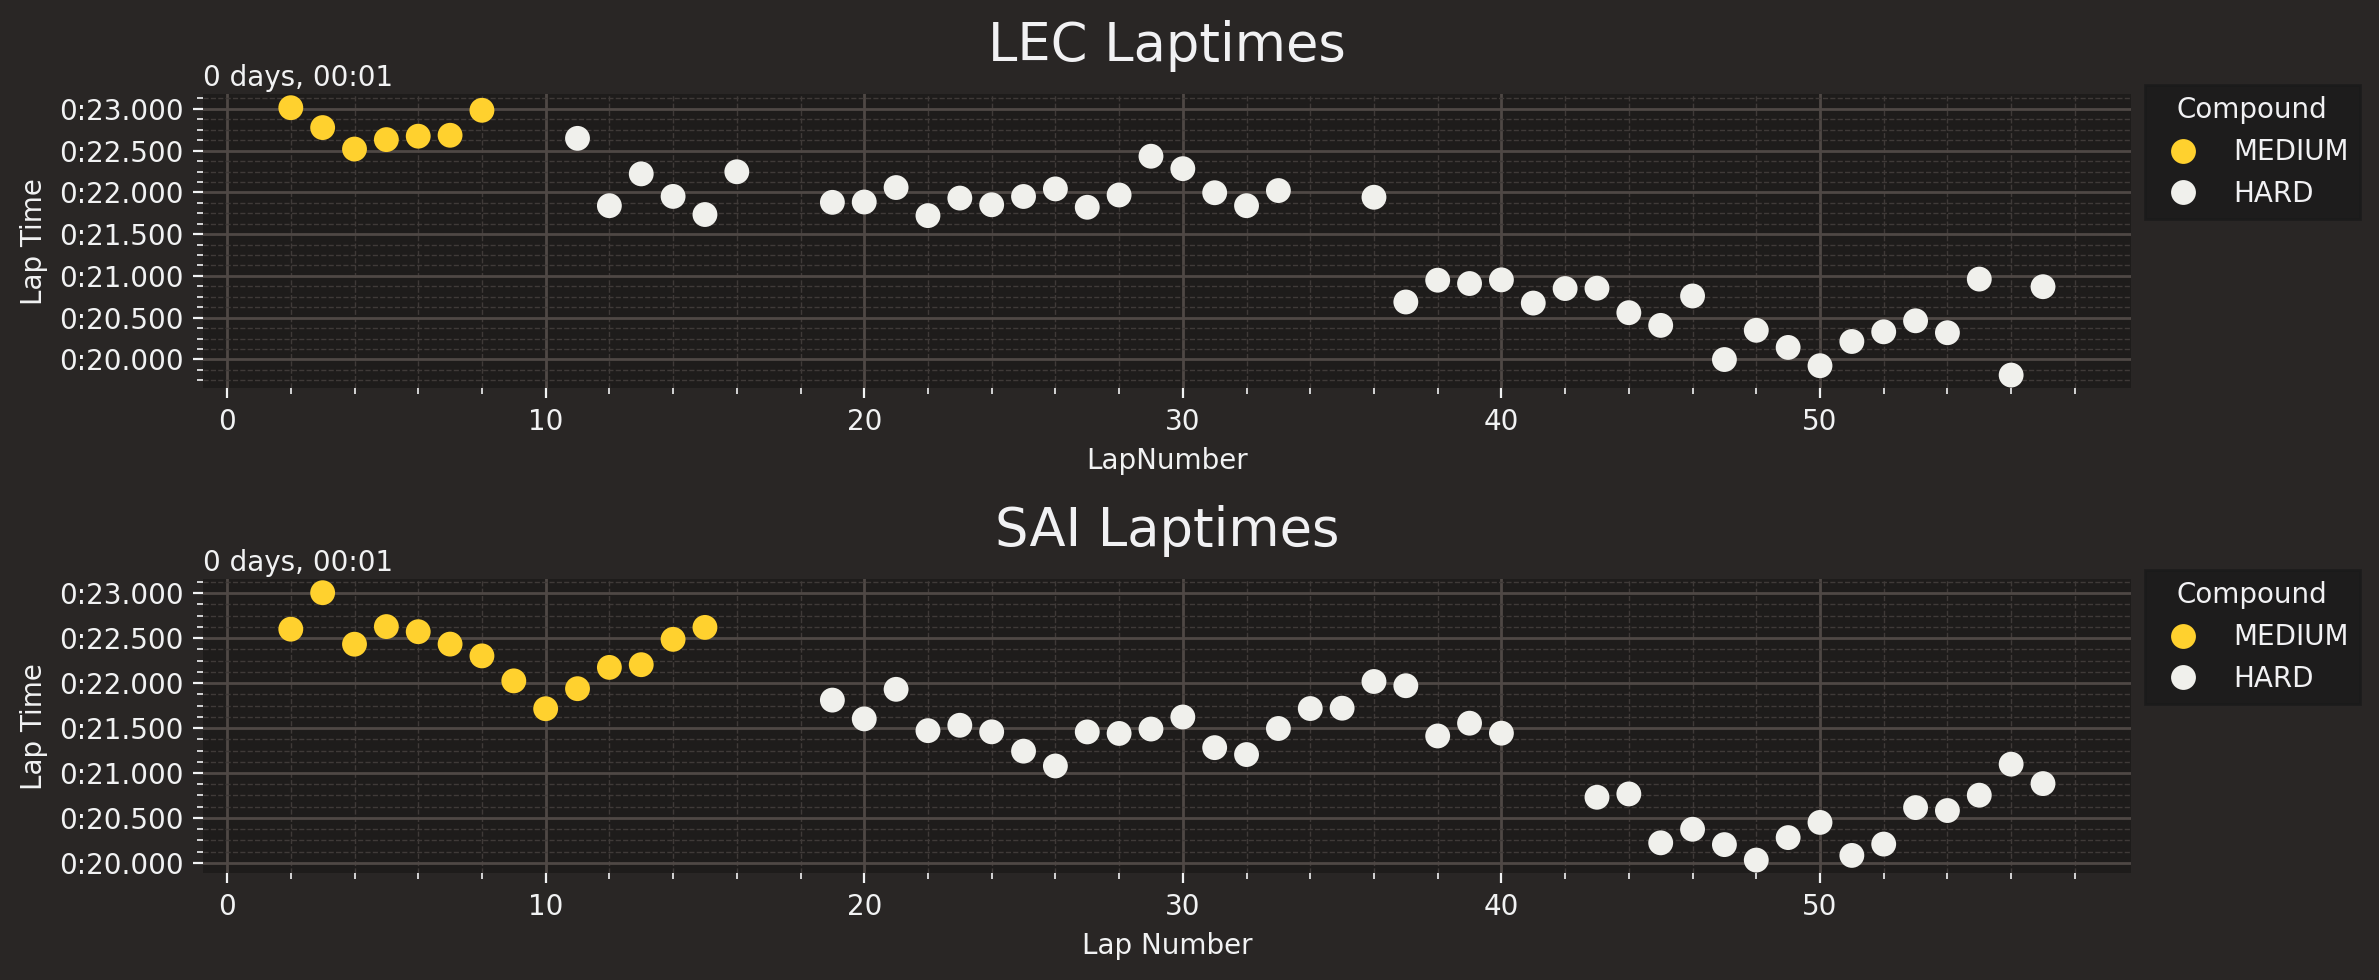

In [17]:
plot_driver_laptimes(session, 'LEC', 'SAI')

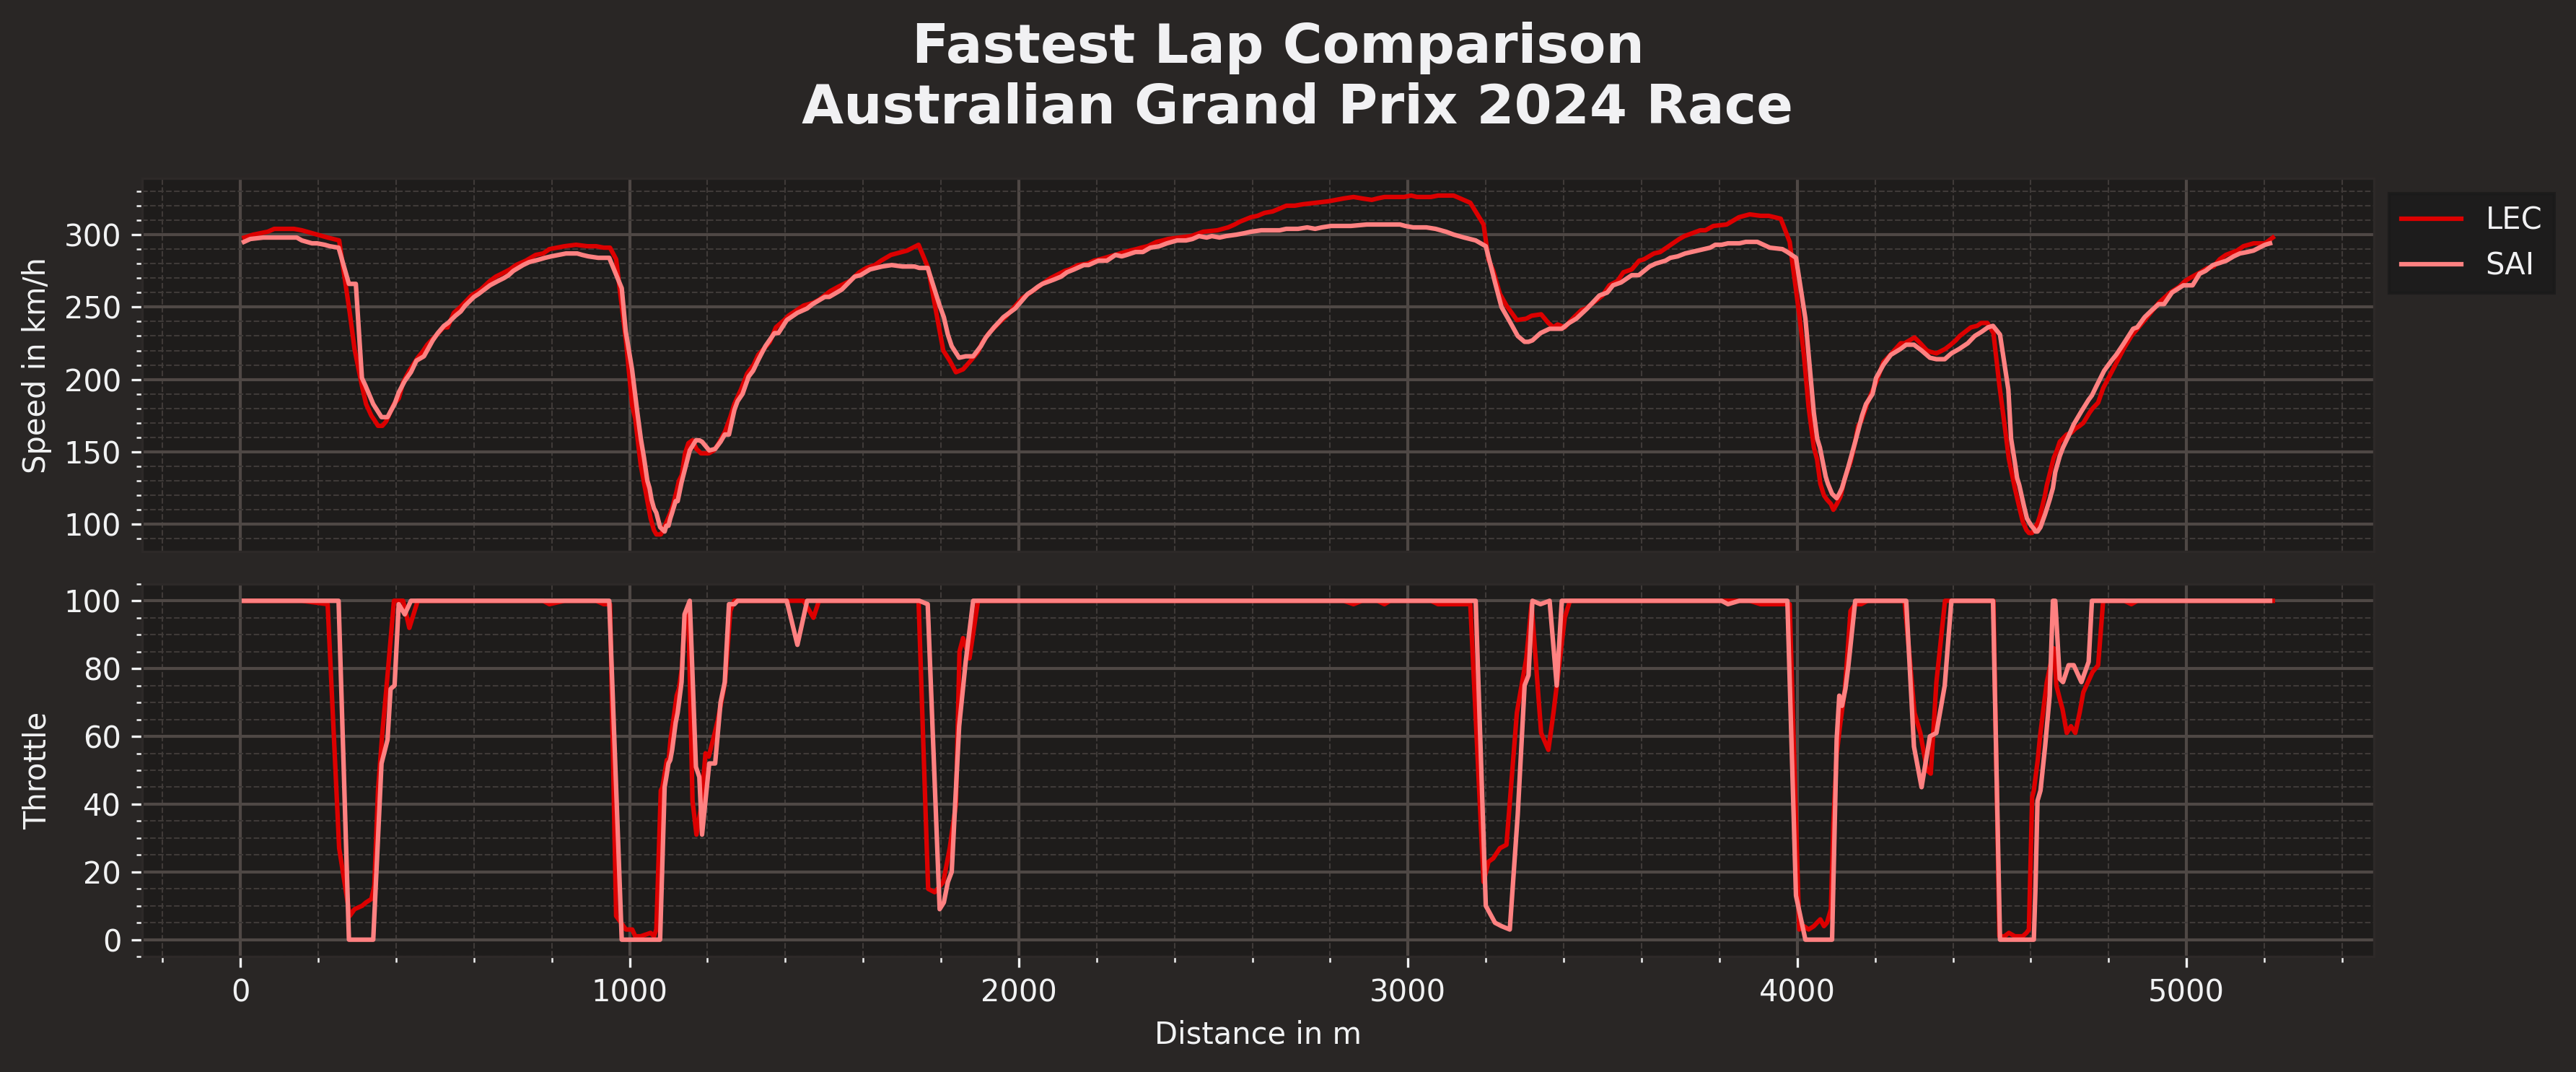

In [18]:
lec_col = ff1.plotting.driver_color('LEC')
sai_col = ff1.plotting.driver_color('SAI')

fig, (ax1,ax2) = plt.subplots(2,1,figsize = (12,5), dpi = 300)
ax1.plot(lec_tel['Distance'], lec_tel['Speed'], color=lec_col, label='LEC')
ax1.plot(sai_tel['Distance'], sai_tel['Speed'], color=sai_col, label='SAI')

ax1.tick_params(
    axis='x',          
    which='both',     
    bottom=False,      
    top=False,        
    labelbottom=False)


ax2.plot(lec_tel['Distance'], lec_tel['Throttle'],color = lec_col)
ax2.plot(sai_tel['Distance'], sai_tel['Throttle'],color = sai_col)

ax1.set_ylabel('Speed in km/h')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_xlabel('Distance in m')
ax2.set_ylabel('Throttle')

plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Race", fontsize = 18, fontweight = 'bold')
plt.tight_layout()
plt.show()

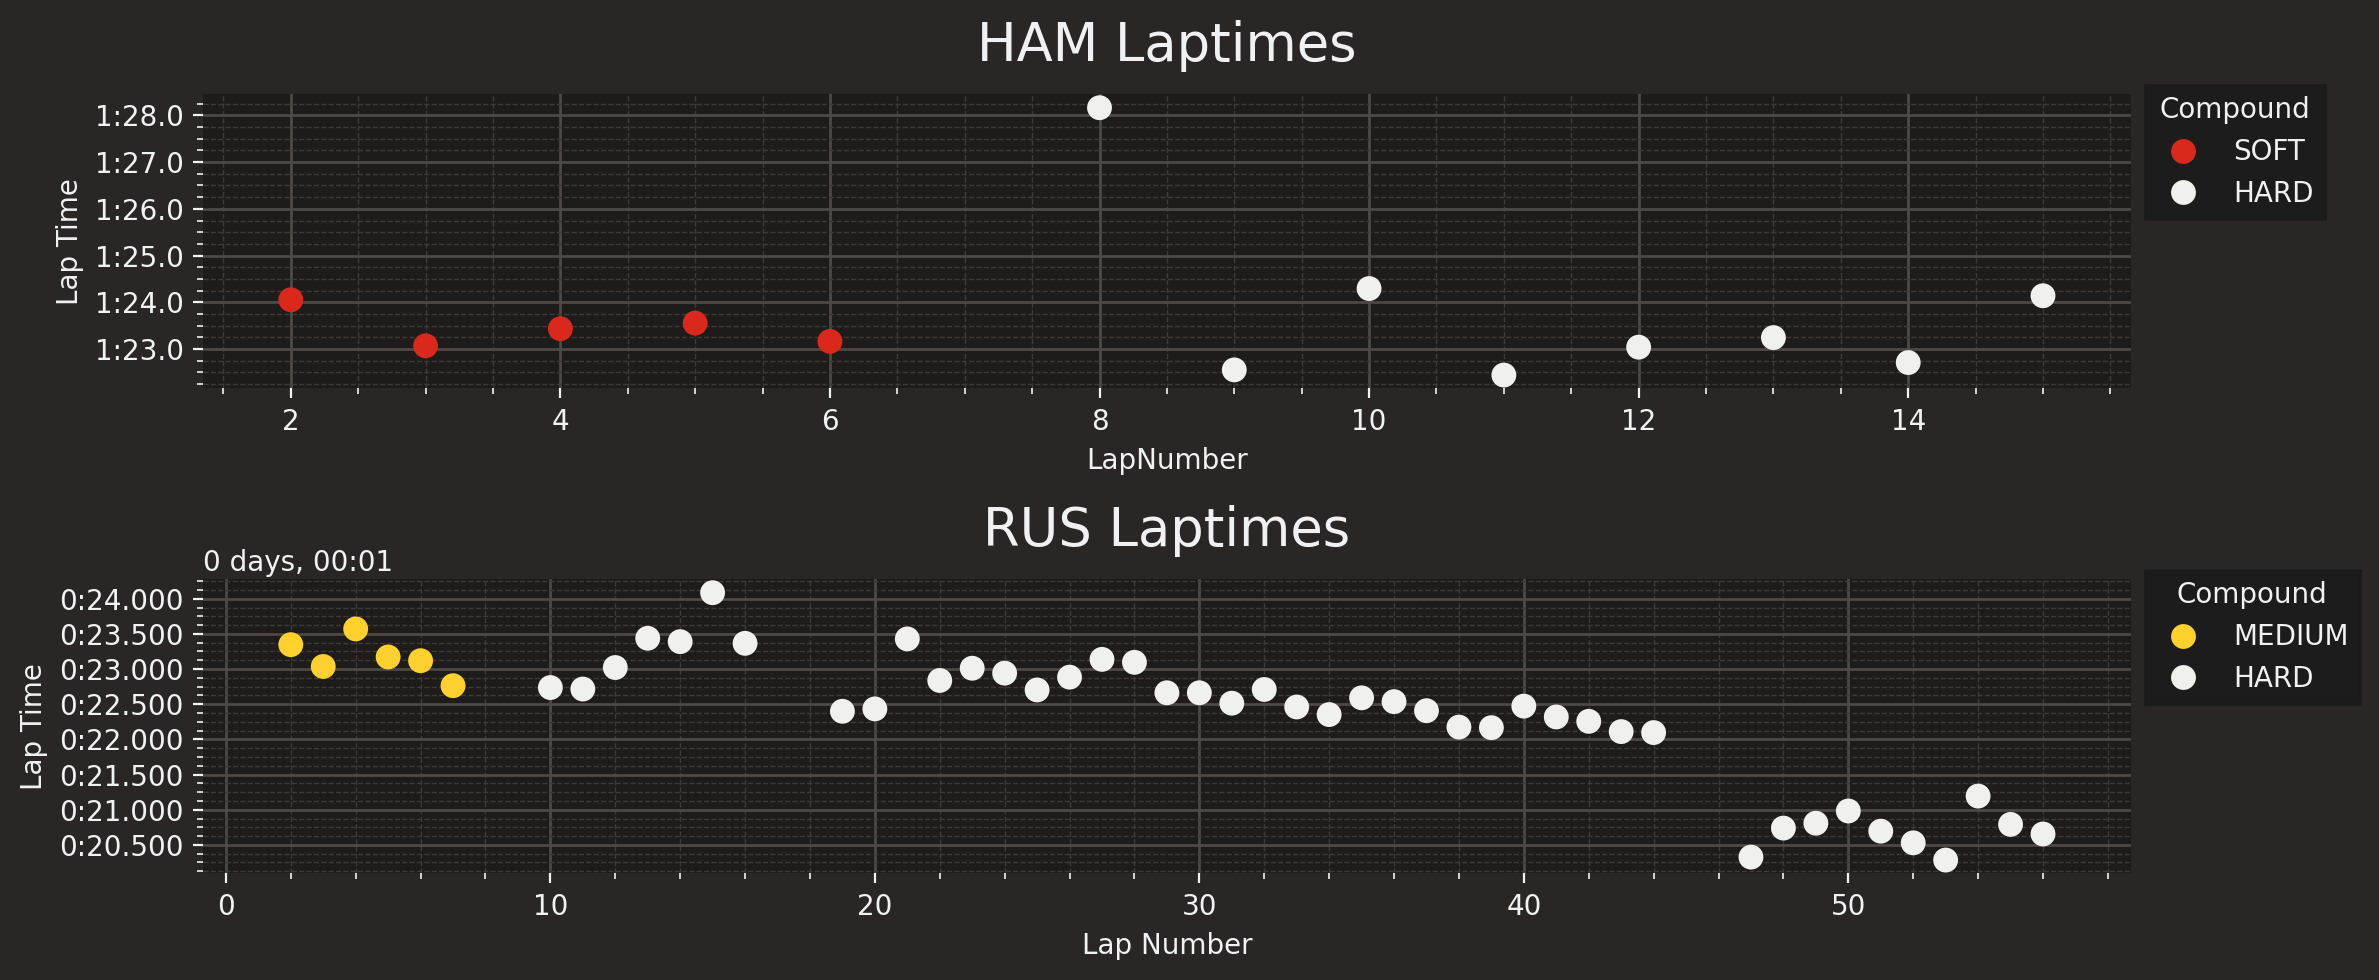

In [19]:
plot_driver_laptimes(session, 'HAM', 'RUS')

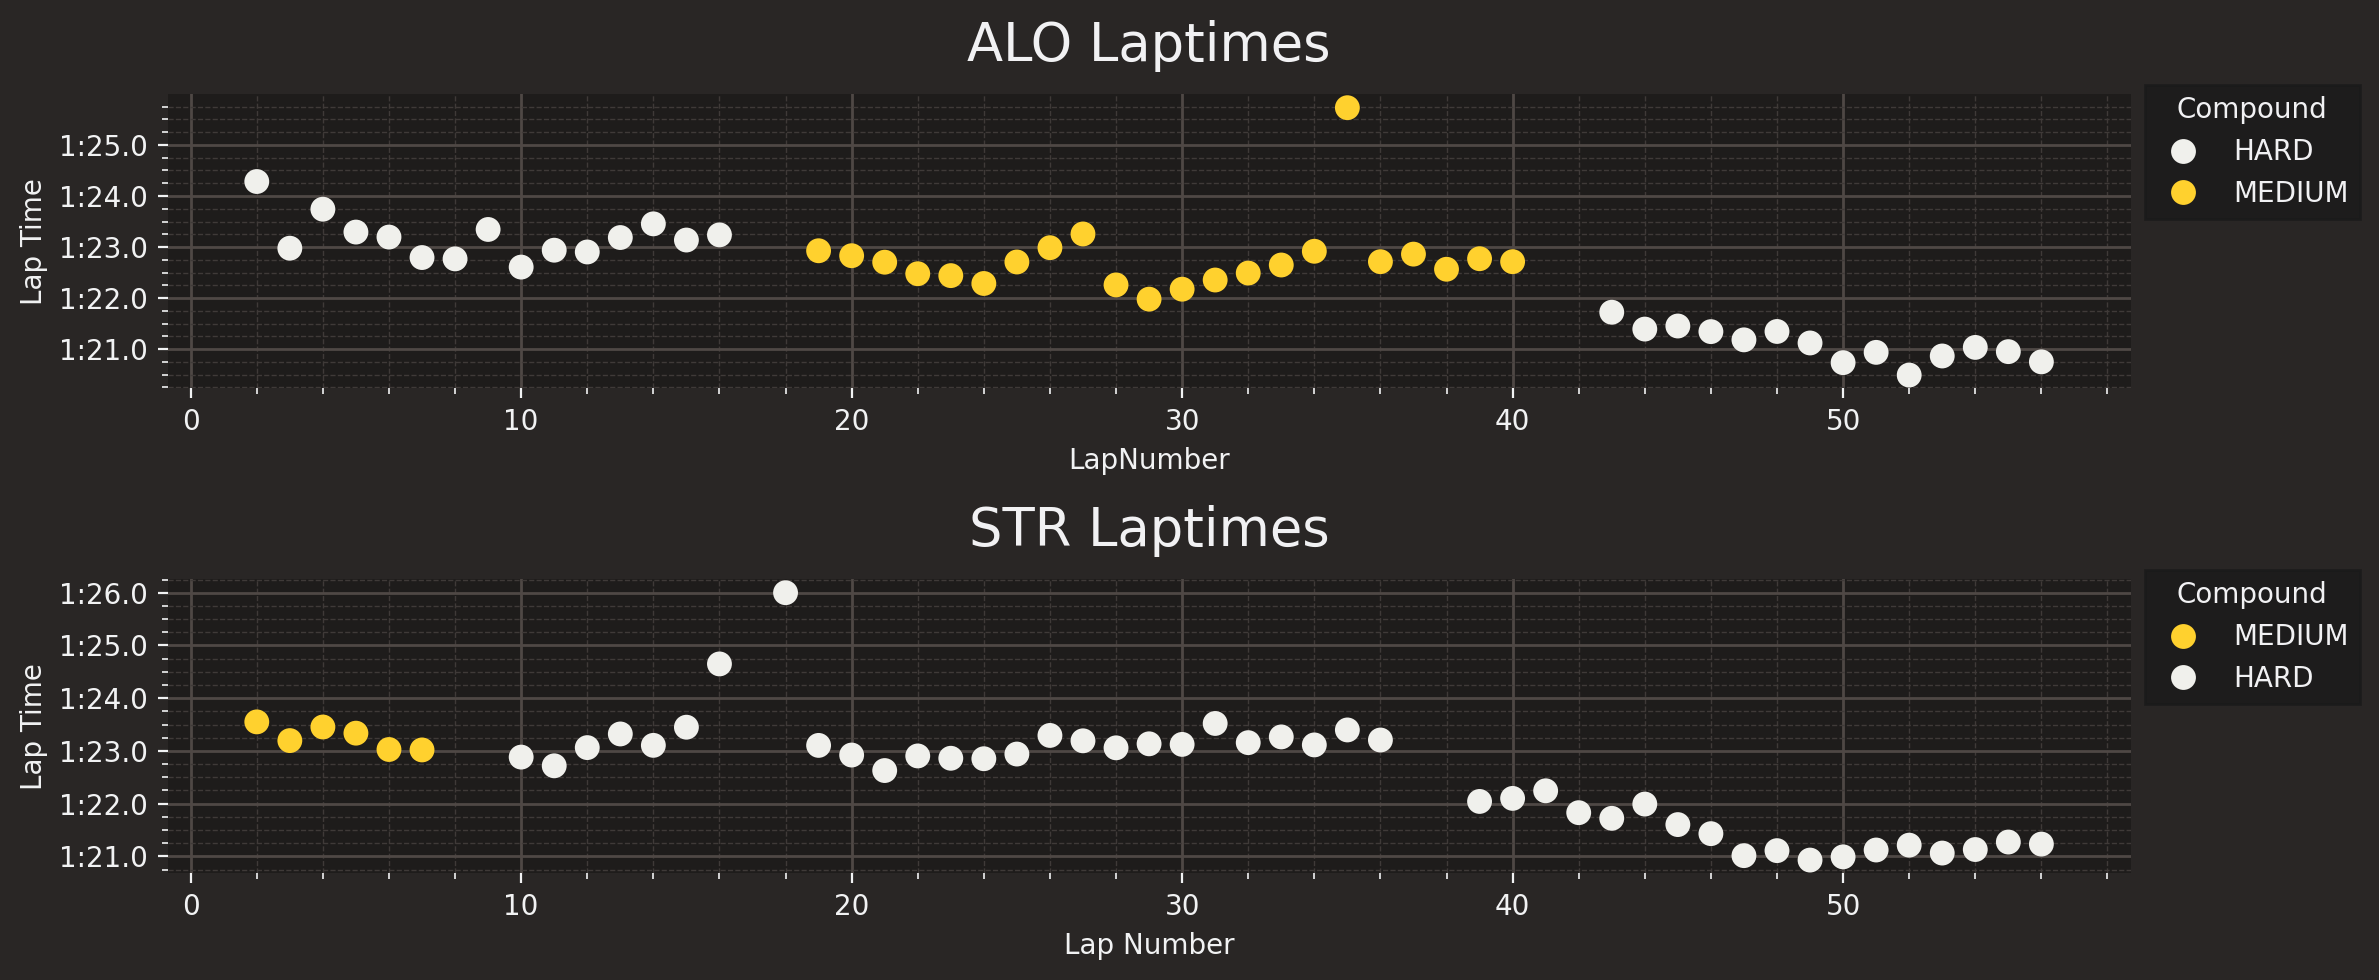

In [20]:
plot_driver_laptimes(session, 'ALO', 'STR')

# Lap Time Distribution 

In [21]:
point_finishers = session.drivers[:10]
print(point_finishers)

driver_laps = session.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()
finishing_order = [session.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
print(driver_colors)

['55', '16', '4', '81', '11', '18', '22', '14', '27', '20']
['SAI', 'LEC', 'NOR', 'PIA', 'PER', 'STR', 'TSU', 'ALO', 'HUL', 'MAG']
{'LEC': '#dc0000', 'SAI': '#ff8181', 'SHW': '#9c0000', 'VER': '#fcd700', 'PER': '#ffec7b', 'DEN': '#907400', 'PIA': '#ff8700', 'NOR': '#eeb370', 'OWA': '#ee6d3a', 'GAS': '#fe86bc', 'OCO': '#ff117c', 'DOO': '#894667', 'BOT': '#00e701', 'ZHO': '#008d01', 'POU': '#004601', 'DEV': '#1e3d61', 'TSU': '#356cac', 'RIC': '#2b4562', 'LAW': '#2b4562', 'HAD': '#1e6176', 'MAG': '#ffffff', 'HUL': '#cacaca', 'BEA': '#c40000', 'ALO': '#006f62', 'STR': '#00413b', 'DRU': '#2f9b90', 'HAM': '#00d2be', 'RUS': '#24ffff', 'VES': '#00a6ff', 'ALB': '#005aff', 'SAR': '#012564', 'OSU': '#1b3d97'}


In [22]:
fastest_laps_by_team = driver_laps.groupby('Team')['LapTime'].min().reset_index()

In [23]:
all_driver = session.drivers[:]
driver_laps = session.laps.pick_drivers(all_driver).pick_quicklaps()
session.laps.pick_        

AttributeError: 'Laps' object has no attribute 'pick_'

In [ ]:
my_compound = {'SOFT': '#da291c',
 'MEDIUM': '#ffd12e',
 'HARD': '#0a0a0a',
 'INTERMEDIATE': '#43b02a',
 'WET': '#0067ad',
 'UNKNOWN': '#00ffff',
 'TEST-UNKNOWN': '#434649'}

In [ ]:
from matplotlib.patches import Patch

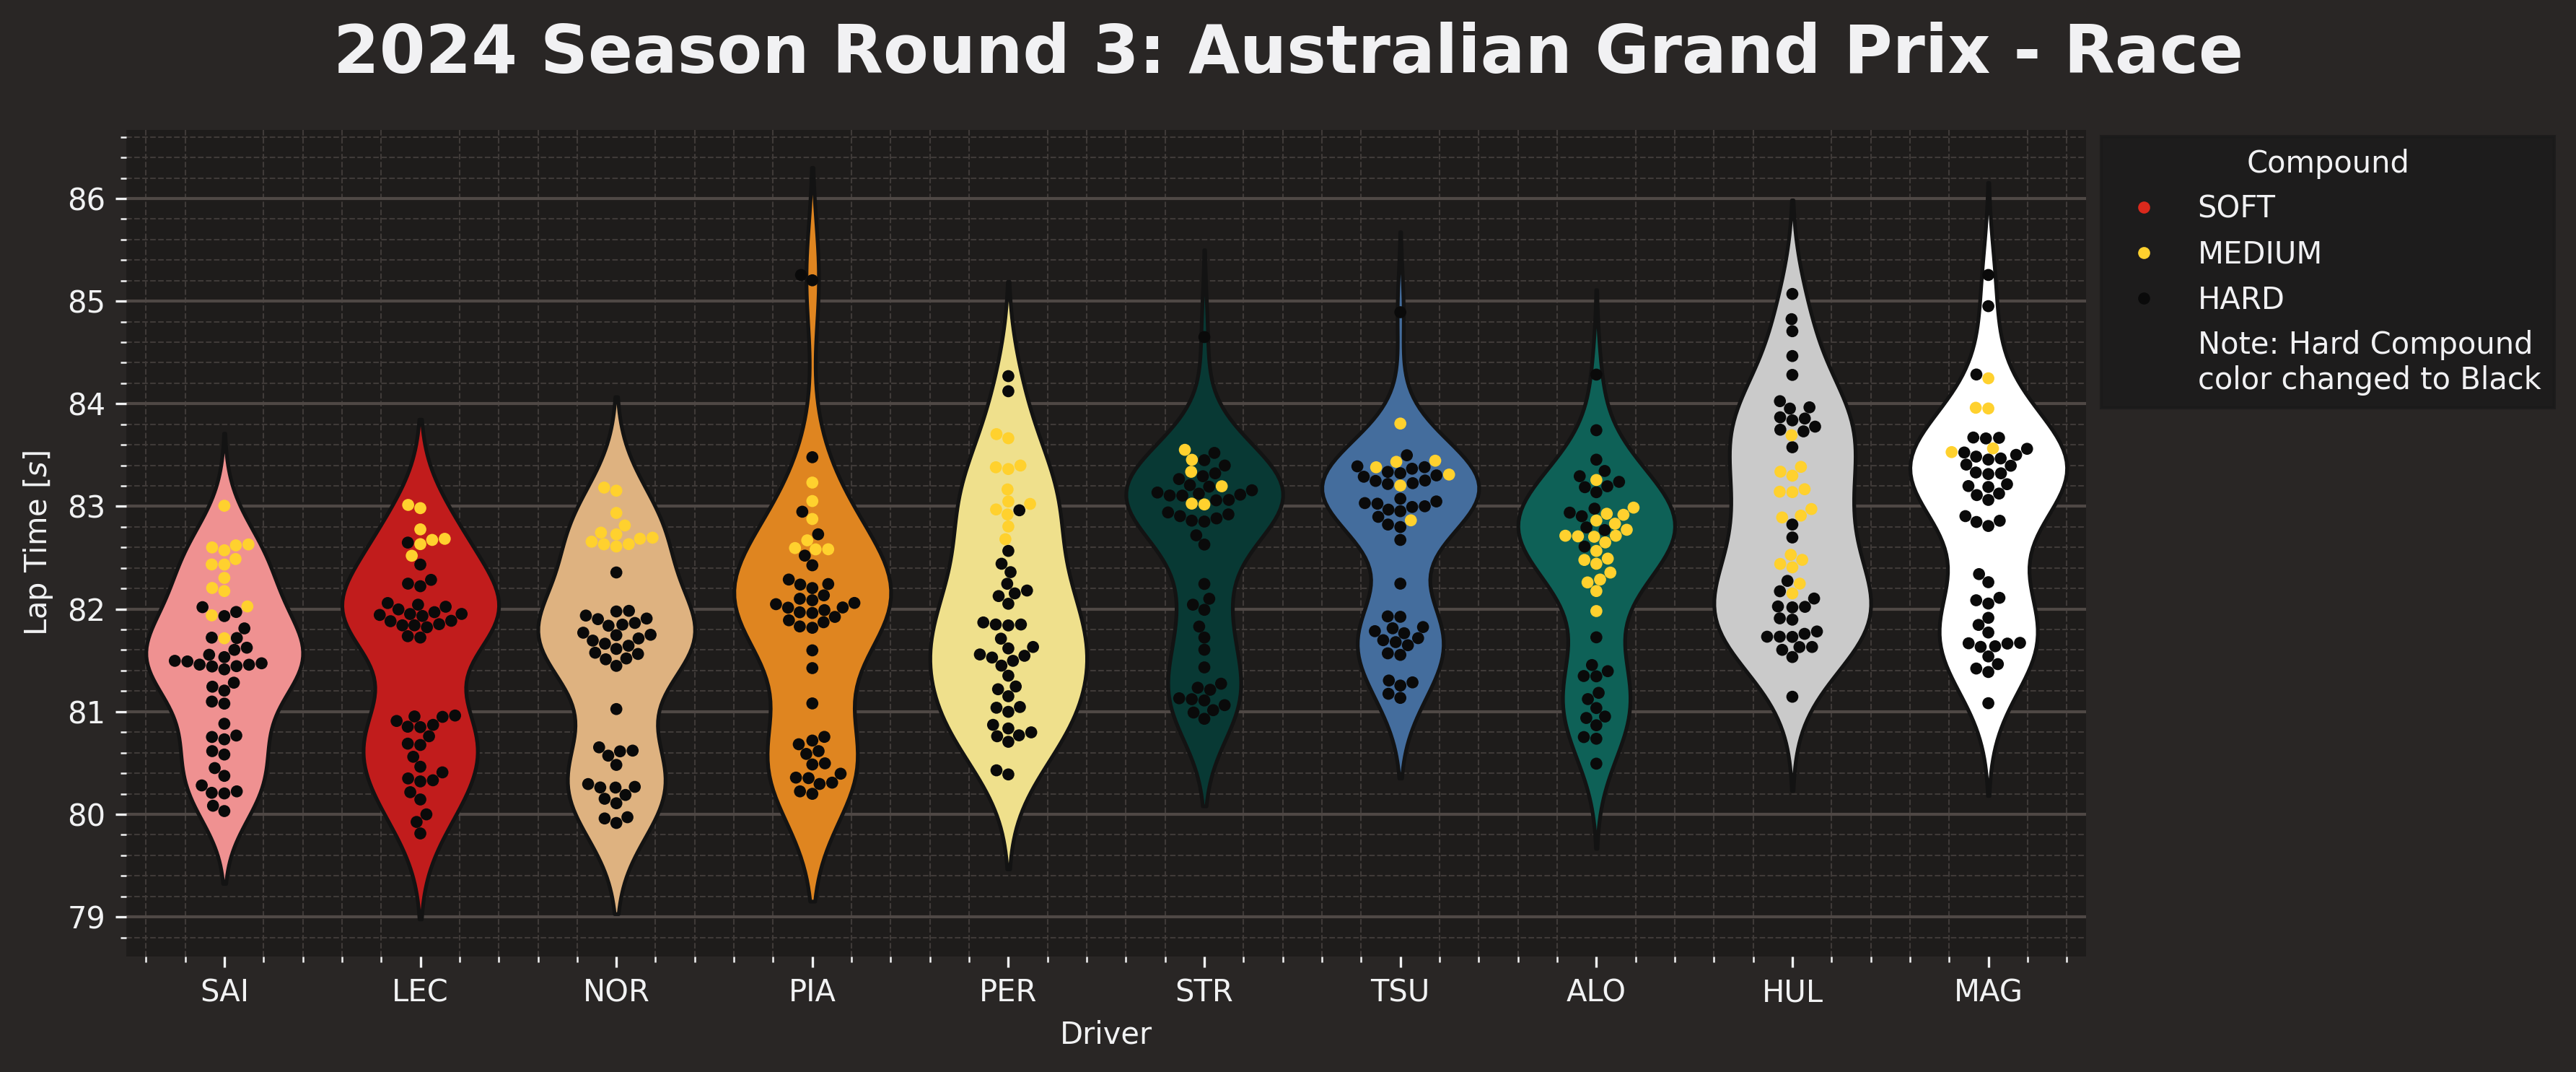

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5), dpi = 300)

driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=my_compound,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time $[s]$")

# plot the legend outside the plot 
handles, labels = ax.get_legend_handles_labels()

# Note
note_handle = Patch(color='none')
handles.append(note_handle)
labels.append('Note: Hard Compound \ncolor changed to Black')


ax.legend(handles=handles, labels=labels, title="Compound", loc="upper left", bbox_to_anchor=(1, 1.01))

plt.suptitle(session, fontsize = 22, fontweight = 'bold')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Tyre Usage comparison 

In [ ]:
from utlis import plot  